# Big-Data-Project

In [0]:
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/files/1342/1342-0.txt" , "/tmp/Rohith.txt")


Out[1]: ('/tmp/Rohith.txt', <http.client.HTTPMessage at 0x7f8fb7336d00>)

In [0]:
dbutils.fs.mv("file:/tmp/Rohith.txt","dbfs:/data/Rohith.txt")

Out[2]: True

In [0]:
rohithRDD = sc.textFile("dbfs:/data/Rohith.txt")

In [0]:
wordRDD=rohithRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
tokenCleanerRDD = wordRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover =StopWordsRemover()
stopwords = remover.getStopWords()
cleanedwordRDD=tokenCleanerRDD.filter(lambda w: w not in stopwords)

In [0]:
IKVPairsRDD= cleanedwordRDD.map(lambda word: (word,1))

In [0]:
wordsCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
results = wordsCountRDD.collect()

In [0]:
results.sort(key=lambda x:x[1])
results.reverse()
print(results[:12])

[('', 2597), ('mr', 783), ('elizabeth', 594), ('said', 401), ('darcy', 371), ('mrs', 343), ('much', 328), ('must', 318), ('bennet', 293), ('miss', 283), ('one', 266), ('jane', 262)]

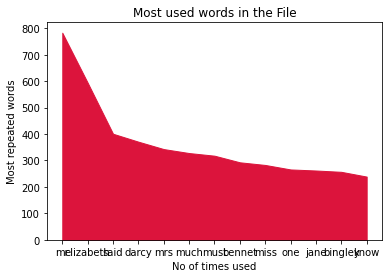

In [0]:
mostCommon=results[1:14]
word,count = zip(*mostCommon)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.stackplot(word,count, color='crimson')
plt.xlabel("No of times used")
plt.ylabel("Most repeated words")
plt.title("Most used words in the File")
plt.show()
 